In [ ]:
!nvidia-smi

Sat Mar  4 06:24:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Kfwd6HUOF4dqFKFXQAsM")
project = rf.workspace("college-4ujqi").project("bone-2qyku")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to bone-1 in yolov8:: 100%|██████████| 246/246 [00:00<00:00, 1929.85it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 77.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/bone-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch0.jpg
confusion_matrix.png				   train_batch105.jpg
events.out.tfevents.1677911183.7df4d623dc80.758.0  train_batch106.jpg
F1_curve.png					   train_batch107.jpg
P_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
R_curve.png					   val_batch0_labels.jpg
results.csv					   val_batch0_pred.jpg
results.png					   weights


/content


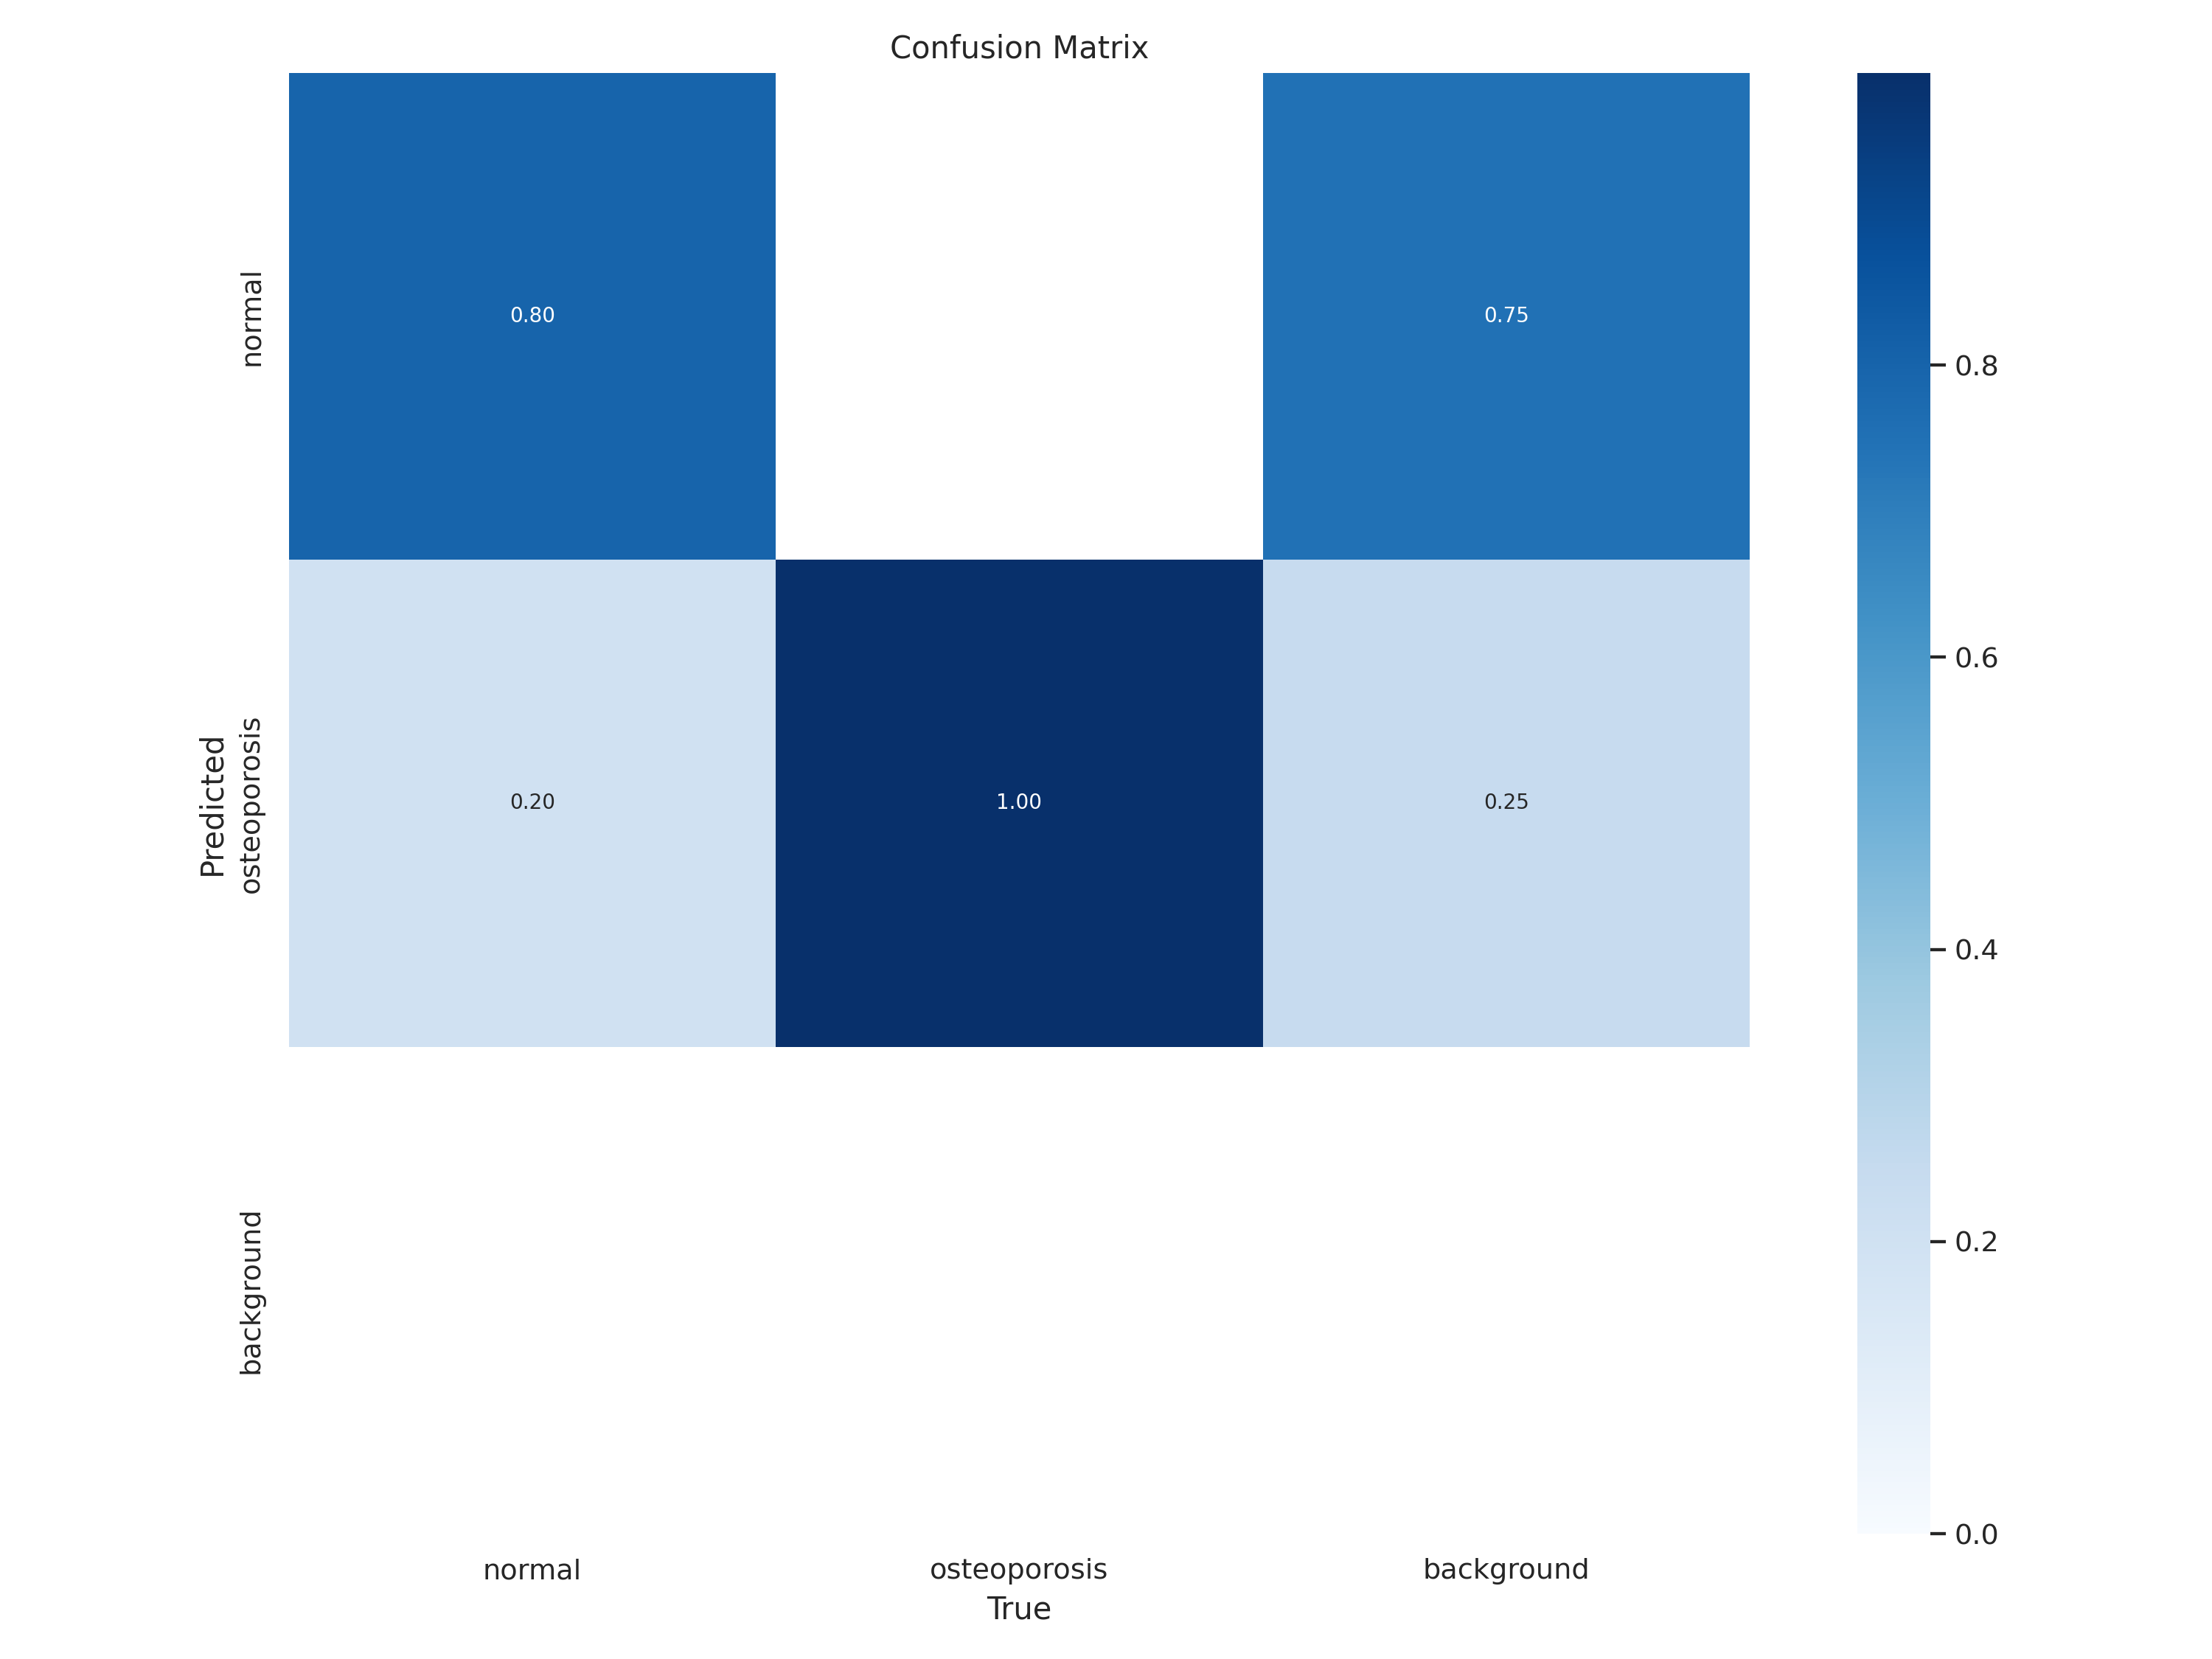

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


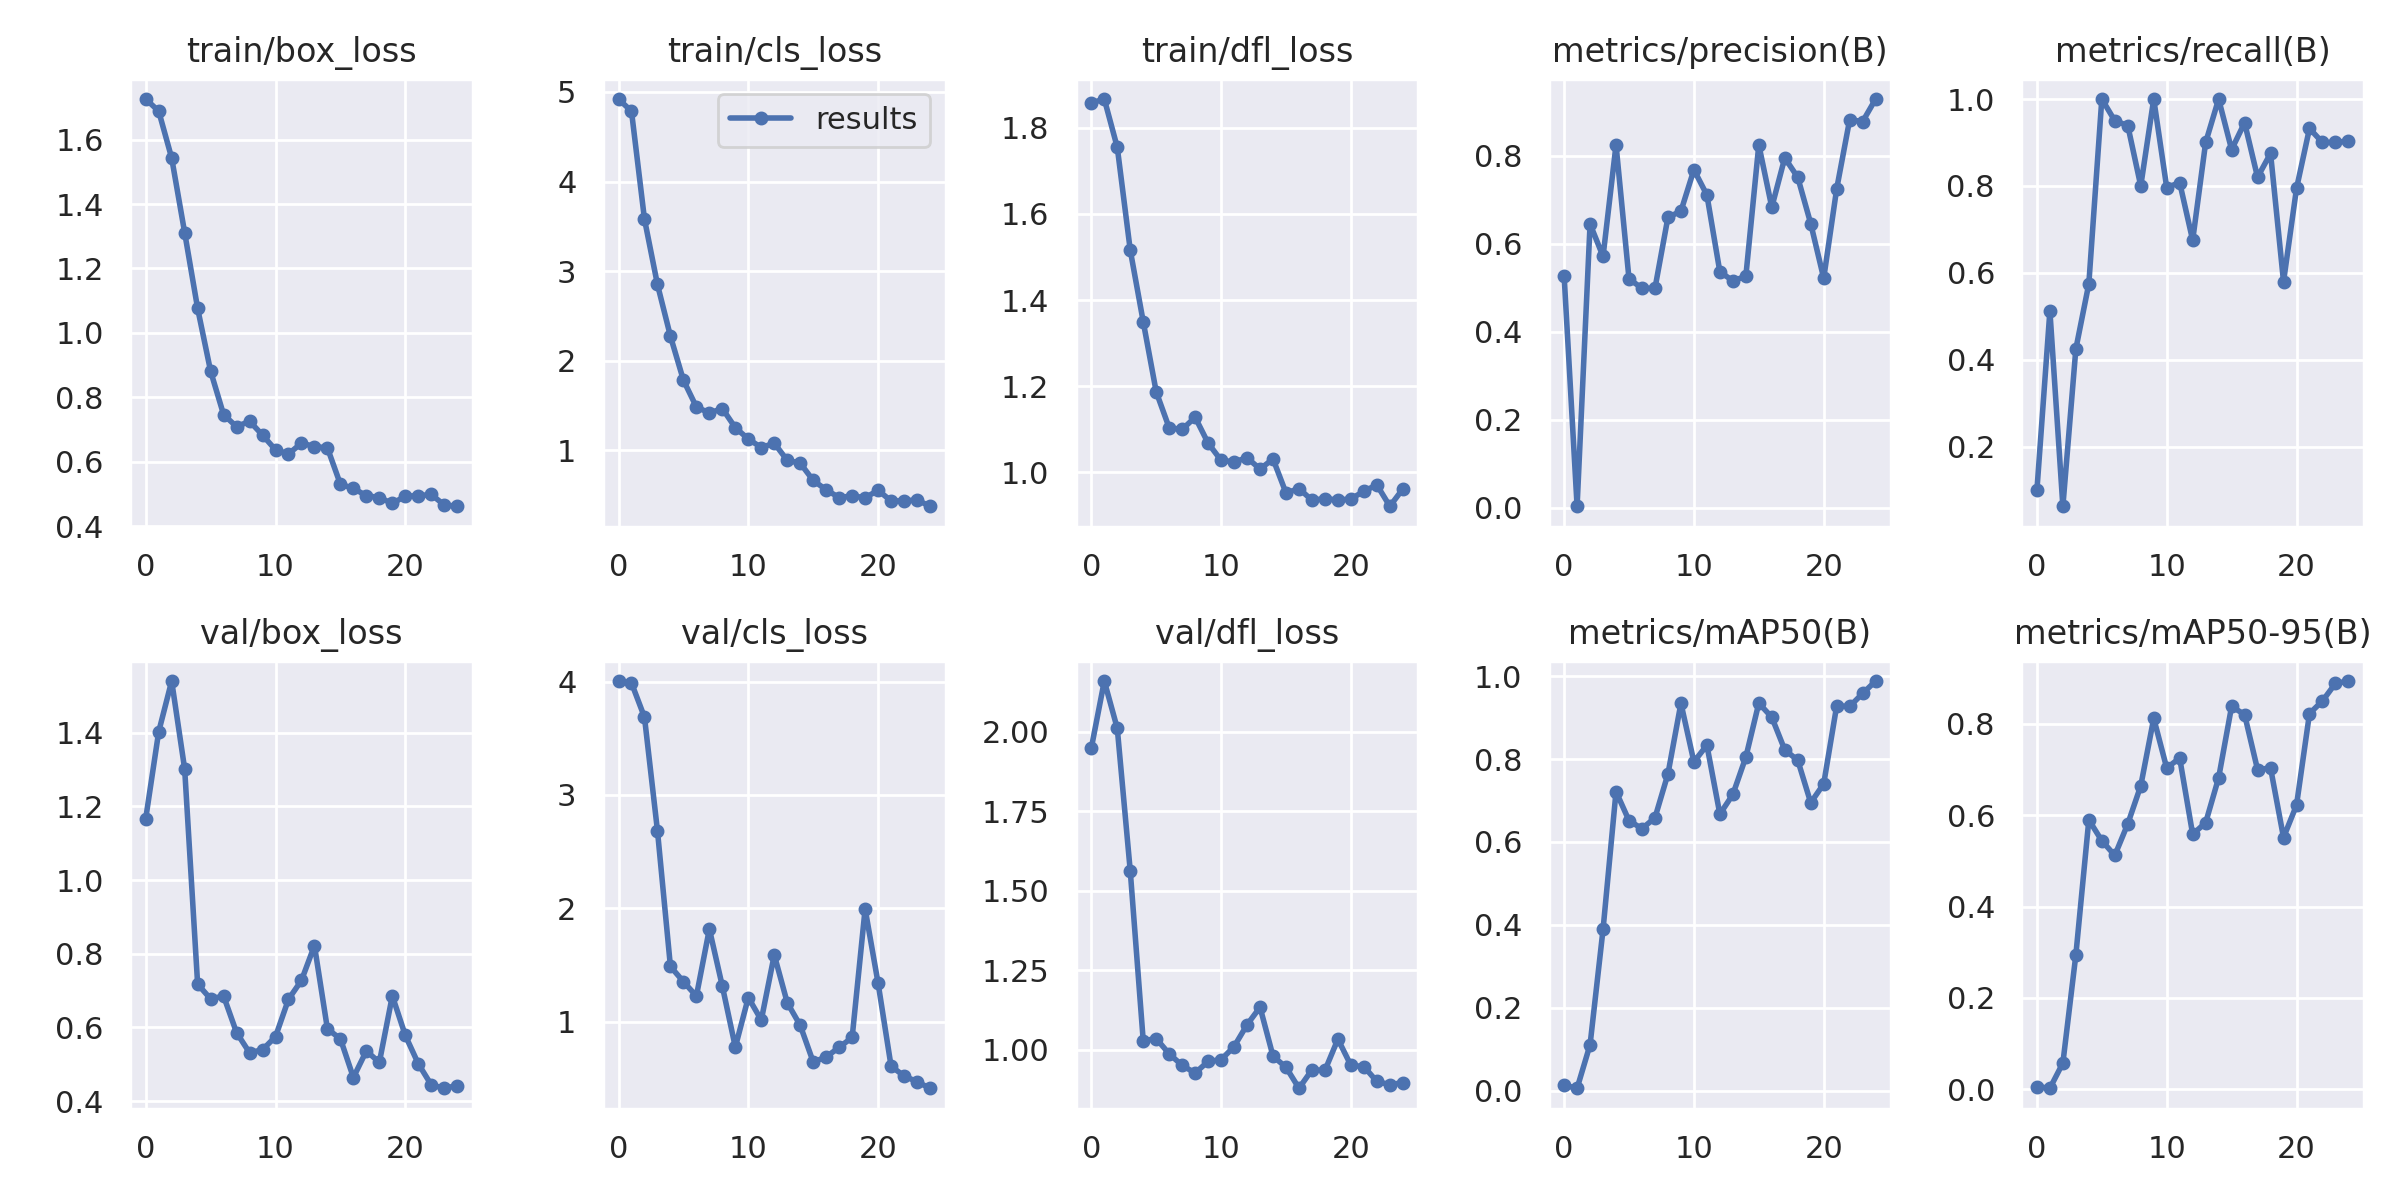

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


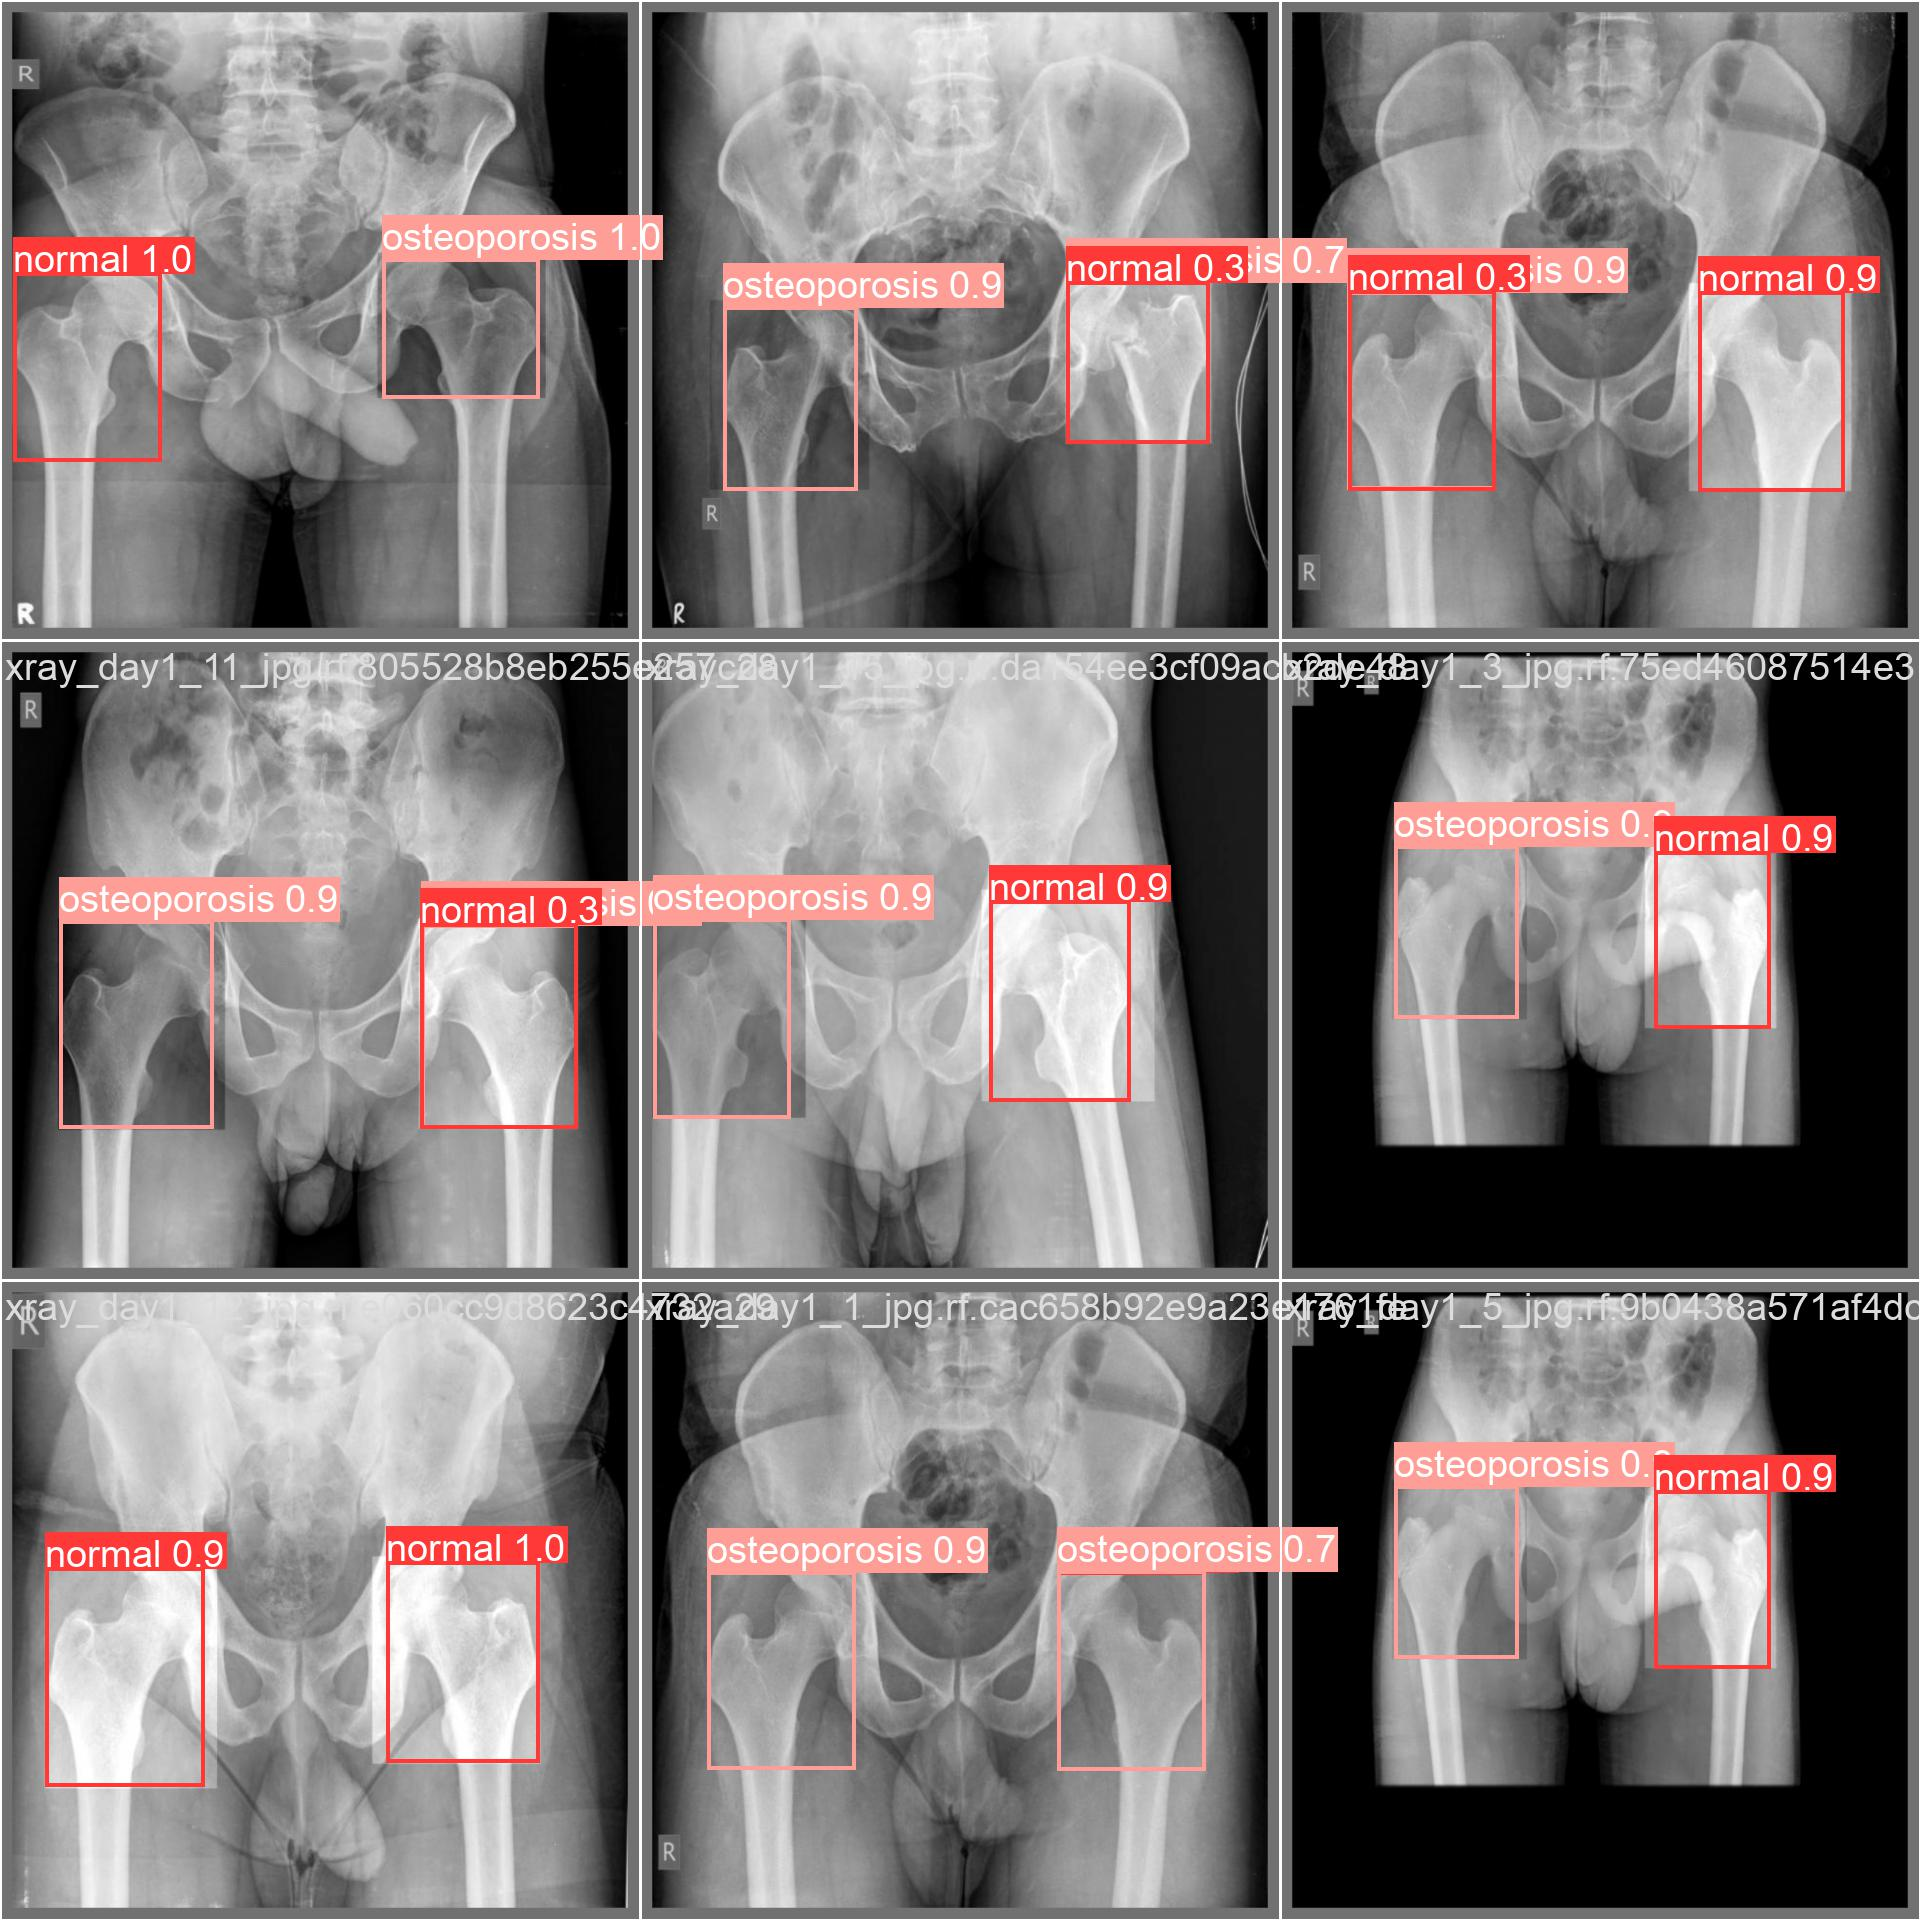

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/bone-1/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.42it/s]
                   all          9         18      0.929      0.904      0.988      0.888
                normal          9         10          1      0.807      0.995      0.889
          osteoporosis          9          8      0.858          1      0.982      0.887
Speed: 0.4ms pre-process, 20.7ms inference, 0.0ms loss, 1.3ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/6 /content/datasets/bone-1/test/images/xray_day1_11_jpg.rf.d78712adca2d82a56ac062208b7933c8.jpg: 800x800 1 normal, 1 osteoporosis, 26.1ms
image 2/6 /content/datasets/bone-1/test/images/xray_day1_15_jpg.rf.28eb32c001616e47468028a29e05b99f.jpg: 800x800 2 osteoporosiss, 26.1ms
image 3/6 /content/datasets/bone-1/test/images/xray_day1_4_jpg.rf.44abed8a8c0624736d12dcbb4e6e1351.jpg: 800x800 2 normals, 2 osteoporosiss, 26.1ms
image 4/6 /content/datasets/bone-1/test/images/xray_day1_6_jpg.rf.eb3b260e5d2de6a7dcaf2f791dd5567a.jpg: 800x800 2 osteoporosiss, 26.1ms
image 5/6 /content/datasets/bone-1/test/images/xray_day1_7_jpg.rf.7998465d46e6dc6a011fda99cf153152.jpg: 800x800 1 normal, 1 osteoporosis, 27.7ms
image 6/6 /content/datasets/bone-1/test/images/xray_day1_8_jpg.rf.1a3415df8d822fa965160f45b3cb79b3.jpg: 800x800 

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on xray_day1_4_jpg.rf.44abed8a8c0624736d12dcbb4e6e1351.jpg


{'predictions': [{'x': 112.0,
   'y': 420.5,
   'width': 136.0,
   'height': 199.0,
   'confidence': 0.8486974835395813,
   'class': 'osteoporosis',
   'image_path': '/content/datasets/bone-1/test/images/xray_day1_4_jpg.rf.44abed8a8c0624736d12dcbb4e6e1351.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 433.5,
   'y': 415.0,
   'width': 131.0,
   'height': 214.0,
   'confidence': 0.8086389303207397,
   'class': 'osteoporosis',
   'image_path': '/content/datasets/bone-1/test/images/xray_day1_4_jpg.rf.44abed8a8c0624736d12dcbb4e6e1351.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 432.5,
   'y': 416.0,
   'width': 135.0,
   'height': 208.0,
   'confidence': 0.793792724609375,
   'class': 'normal',
   'image_path': '/content/datasets/bone-1/test/images/xray_day1_4_jpg.rf.44abed8a8c0624736d12dcbb4e6e1351.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}